##### 1. Load data And Preprocess

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import seaborn as sns

In [5]:
df = pd.read_csv('flights.csv')
df

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air


In [6]:
df.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

#### 2. Univariate and Bivariate Analysis

#### 2.1 Analysis of Time Patterns and Trends (Identify seasonal, monthly, daily, and hourly patterns in flight departures, arrivals, and delays.)

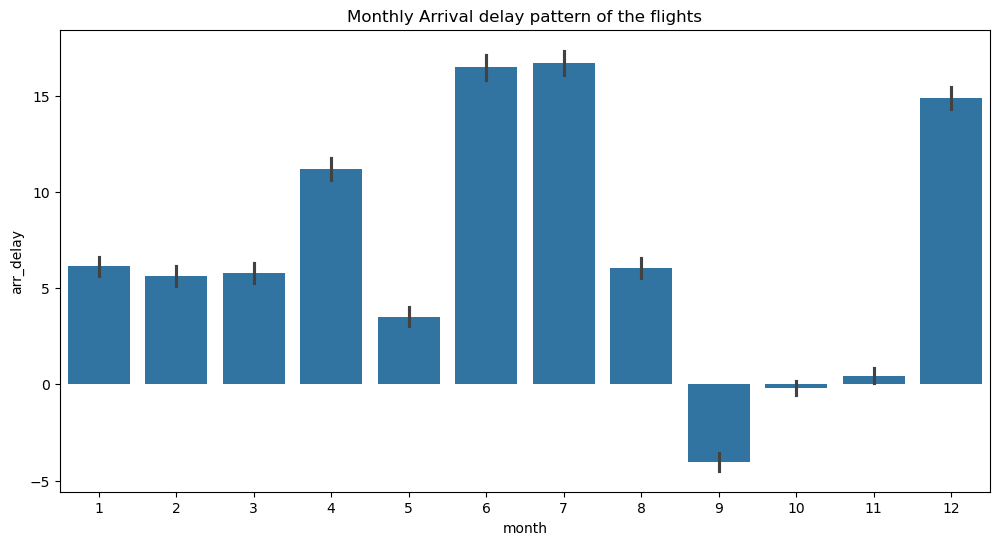

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='arr_delay',data=df)
plt.title('Monthly Arrival delay pattern of the flights')
plt.show()

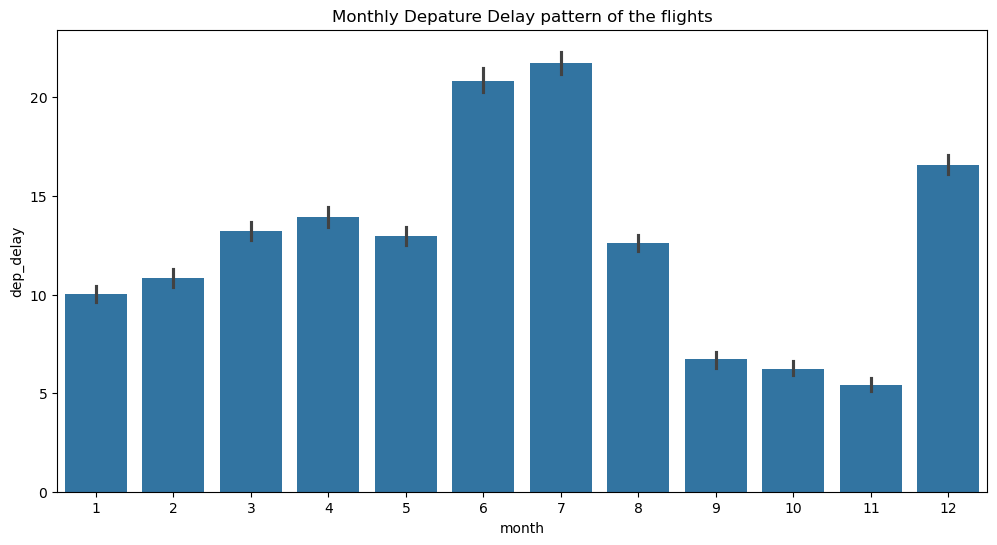

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='dep_delay',data = df)
plt.title("Monthly Depature Delay pattern of the flights")
plt.show()

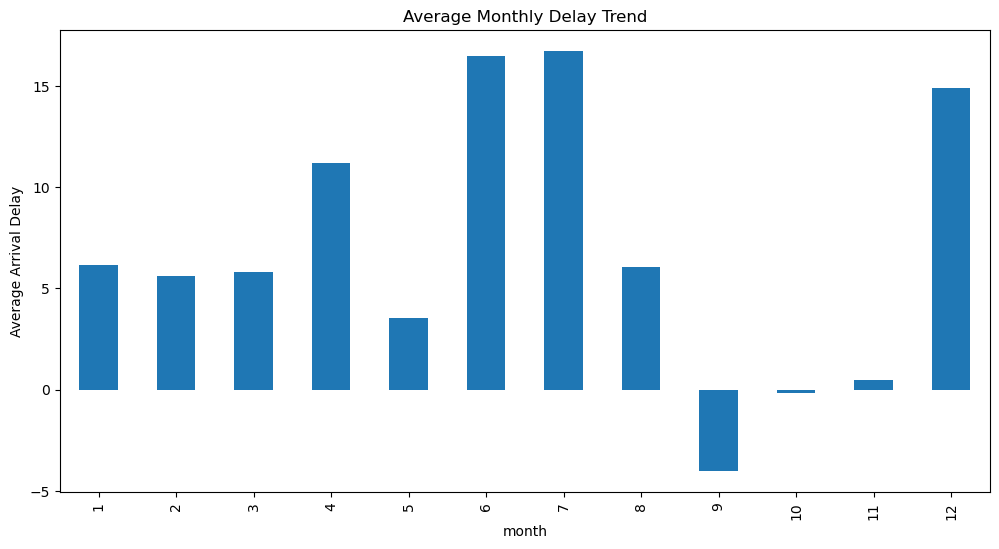

In [39]:
df.groupby('month')['arr_delay'].mean().plot(kind='bar',figsize=(12,6))
plt.title('Average Monthly Delay Trend')
plt.ylabel('Average Arrival Delay')
plt.show()

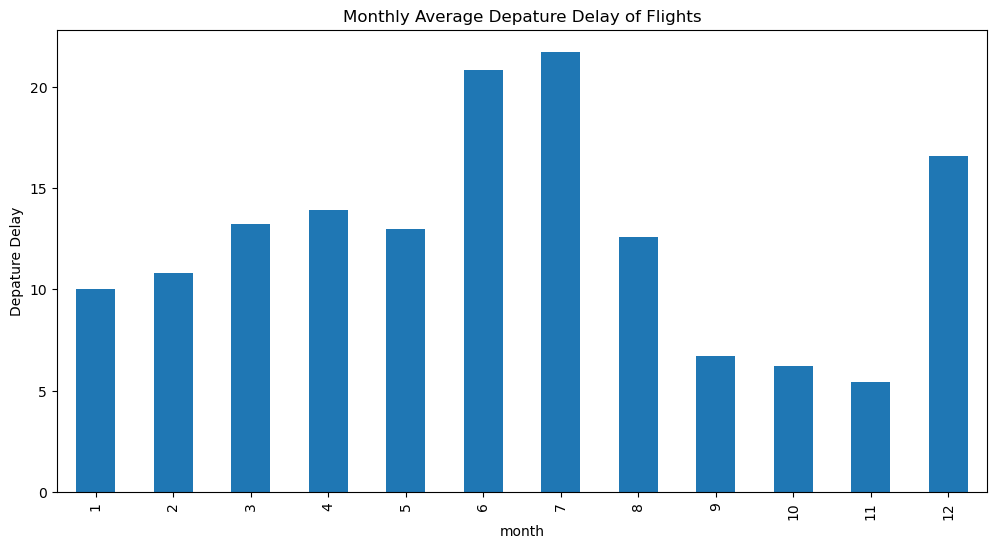

In [37]:
df.groupby('month')['dep_delay'].mean().plot(kind='bar',figsize=(12,6))
plt.title('Monthly Average Depature Delay of Flights')
plt.ylabel('Depature Delay')
plt.show()

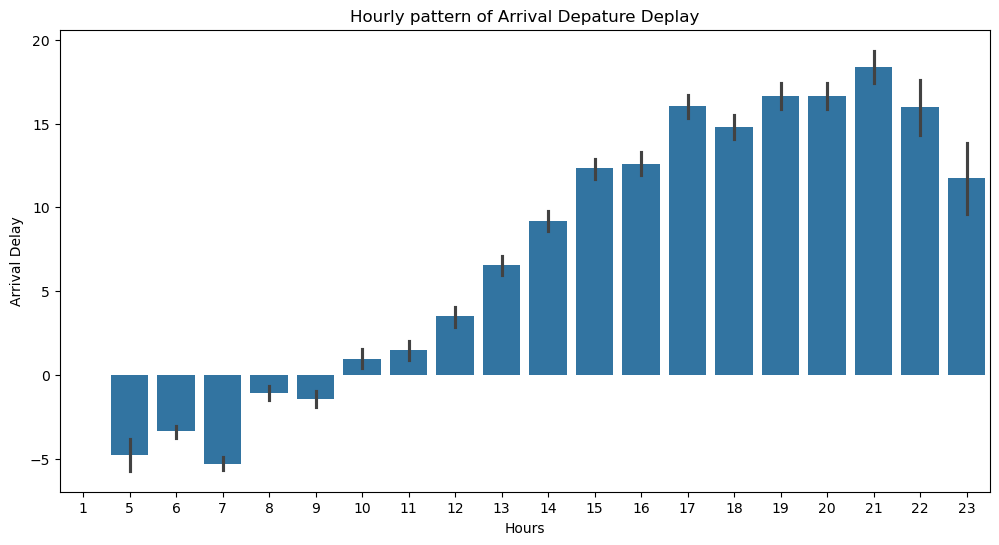

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='hour',y='arr_delay',data=df)
plt.title('Hourly pattern of Arrival Depature Deplay')
plt.xlabel('Hours')
plt.ylabel('Arrival Delay')
plt.show()

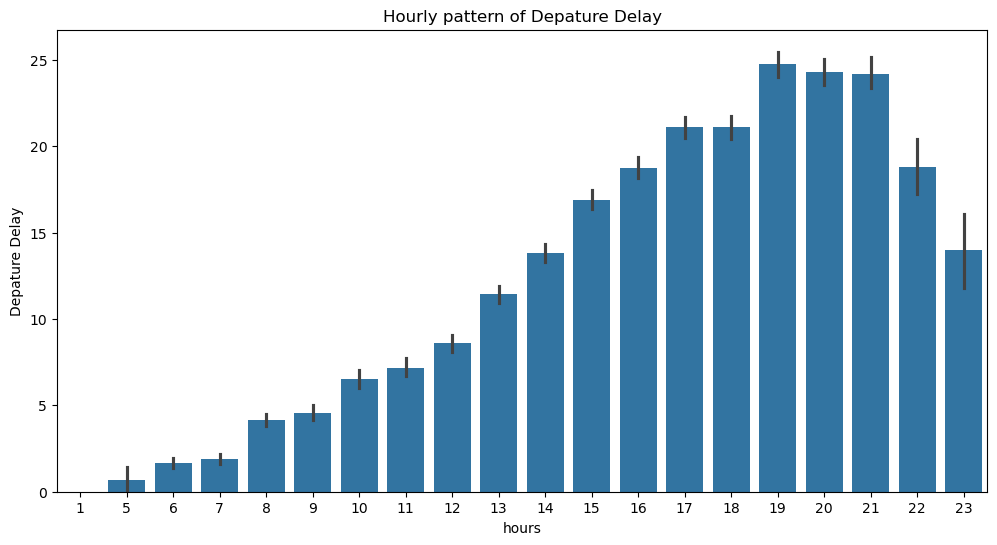

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='hour',y='dep_delay',data=df)
plt.xlabel('hours')
plt.ylabel('Depature Delay')
plt.title('Hourly pattern of Depature Delay')
plt.show()

#### 2.2 Analysis of Airline Companies (Carrier Performance)

In [46]:
order = df['carrier'].value_counts()
order

carrier
UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: count, dtype: int64

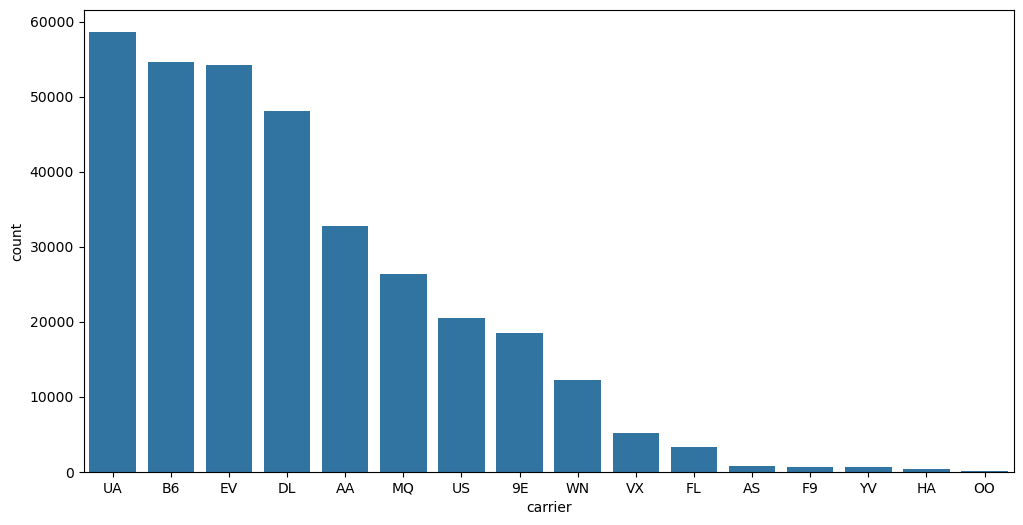

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(x ='carrier', data=df, order = order.index)
plt.show()

In [64]:
carrier_delay = df.groupby('carrier')['arr_delay'].mean().sort_values()
carrier_delay

carrier
AS    -9.930889
HA    -6.915205
AA     0.364291
DL     1.644341
VX     1.764464
US     2.129595
UA     3.558011
9E     7.379669
B6     9.457973
WN     9.649120
MQ    10.774733
OO    11.931034
YV    15.556985
EV    15.796431
FL    20.115906
F9    21.920705
Name: arr_delay, dtype: float64

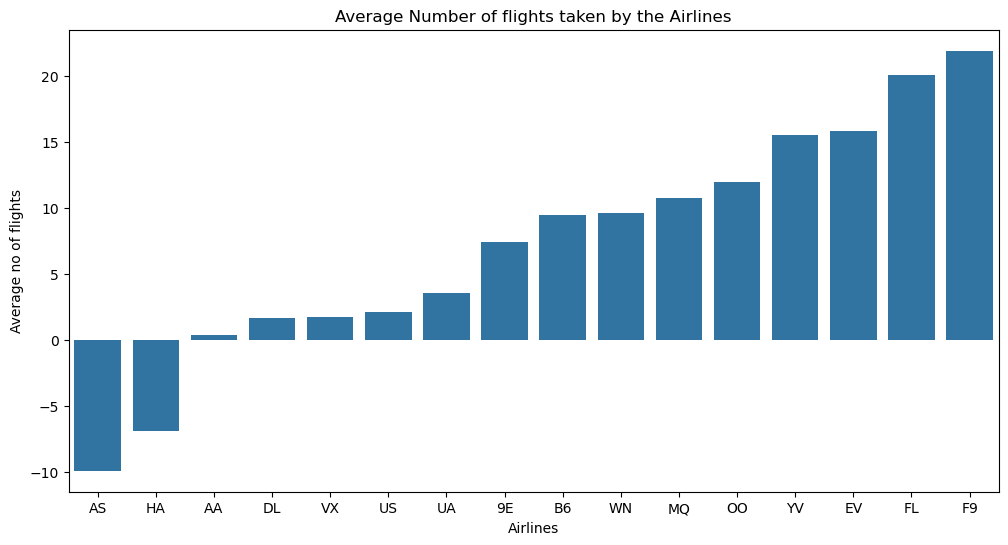

In [66]:
plt.figure(figsize=(12,6))
sns.barplot(x=carrier_delay.index, y = carrier_delay.values)
plt.ylabel('Average no of flights')
plt.xlabel('Airlines')
plt.title('Average Number of flights taken by the Airlines')
plt.show()

In [68]:
carrier_dep_delay = df.groupby('carrier')['dep_delay'].mean().sort_values()
carrier_dep_delay

carrier
US     3.782418
HA     4.900585
AS     5.804775
AA     8.586016
DL     9.264505
MQ    10.552041
UA    12.106073
OO    12.586207
VX    12.869421
B6    13.022522
9E    16.725769
WN    17.711744
FL    18.726075
YV    18.996330
EV    19.955390
F9    20.215543
Name: dep_delay, dtype: float64

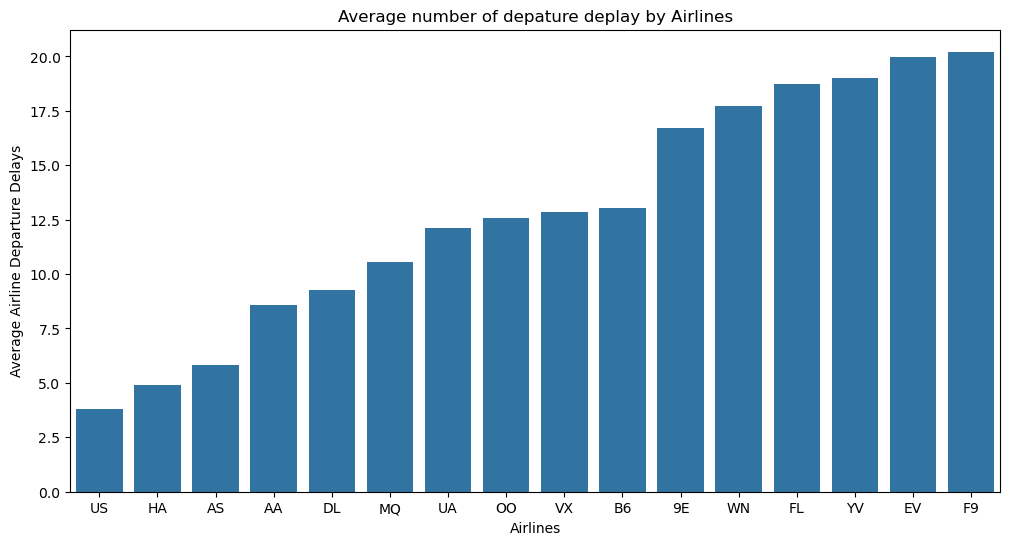

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(x=carrier_dep_delay.index, y = carrier_dep_delay.values)
plt.title('Average number of depature deplay by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Average Airline Departure Delays')
plt.show()

In [114]:
carrier_arr_delay = df.groupby('carrier')['arr_delay'].mean().sort_values(ascending=False)
carrier_dep_delay = df.groupby('carrier')['dep_delay'].mean().sort_values(ascending = False)
top_arr_delay = set(carrier_arr_delay.head(7).index)
print(top_arr_delay)
top_dep_delay = set(carrier_dep_delay.head(7).index)
print(top_dep_delay)


{'EV', 'OO', 'WN', 'FL', 'MQ', 'F9', 'YV'}
{'B6', 'EV', 'WN', 'FL', 'F9', '9E', 'YV'}


In [116]:
carrier_top7 = [c for c in top_arr_delay if c in top_dep_delay]
print(carrier_top7)

['EV', 'WN', 'FL', 'F9', 'YV']


In [122]:
df_top7 = pd.DataFrame({
    'Arrival_Delay':carrier_arr_delay[carrier_top7],
    'Depature_Delay':carrier_dep_delay[carrier_top7]
})
print(df_top7)

         Arrival_Delay  Depature_Delay
carrier                               
EV           15.796431       19.955390
WN            9.649120       17.711744
FL           20.115906       18.726075
F9           21.920705       20.215543
YV           15.556985       18.996330


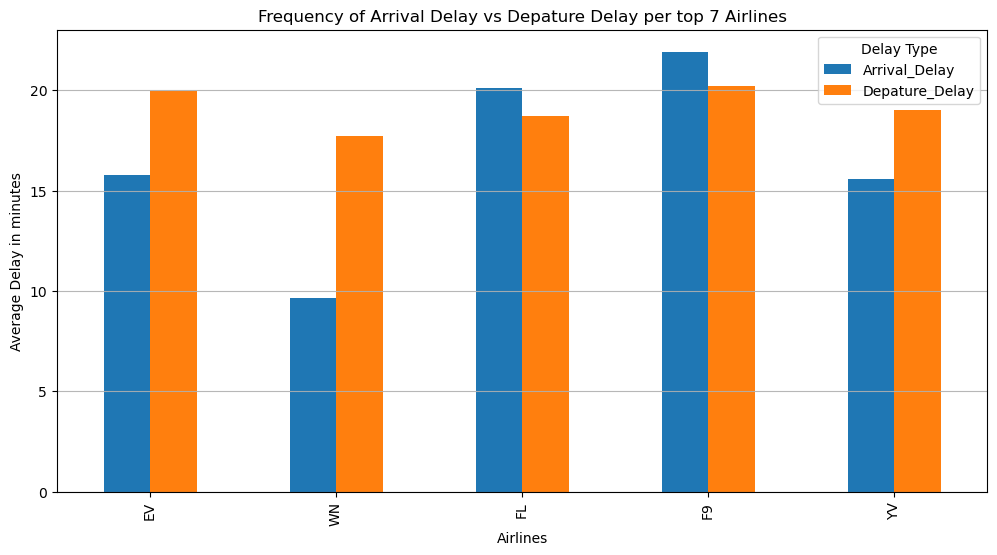

In [140]:
df_top7.plot(kind='bar',figsize=(12,6))
plt.xlabel('Airlines')
plt.ylabel('Average Delay in minutes')
plt.title('Frequency of Arrival Delay vs Depature Delay per top 7 Airlines')
plt.grid(axis='y', linestyle='solid', alpha=0.9)
plt.legend(title='Delay Type')
plt.show()

In [174]:
origin_dep = df.groupby('origin')['dep_delay'].mean().sort_values()
print(origin_dep)
origin_arr = df.groupby('origin')['arr_delay'].mean().sort_values()
print(origin_arr)
origin_arr_carrier = df.groupby(['origin','carrier'])['arr_delay'].mean().sort_values()
print(origin_arr_carrier.index.sort_values())


origin
LGA    10.346876
JFK    12.112159
EWR    15.107954
Name: dep_delay, dtype: float64
origin
JFK    5.551481
LGA    5.783488
EWR    9.107055
Name: arr_delay, dtype: float64
MultiIndex([('EWR', '9E'),
            ('EWR', 'AA'),
            ('EWR', 'AS'),
            ('EWR', 'B6'),
            ('EWR', 'DL'),
            ('EWR', 'EV'),
            ('EWR', 'MQ'),
            ('EWR', 'OO'),
            ('EWR', 'UA'),
            ('EWR', 'US'),
            ('EWR', 'VX'),
            ('EWR', 'WN'),
            ('JFK', '9E'),
            ('JFK', 'AA'),
            ('JFK', 'B6'),
            ('JFK', 'DL'),
            ('JFK', 'EV'),
            ('JFK', 'HA'),
            ('JFK', 'MQ'),
            ('JFK', 'UA'),
            ('JFK', 'US'),
            ('JFK', 'VX'),
            ('LGA', '9E'),
            ('LGA', 'AA'),
            ('LGA', 'B6'),
            ('LGA', 'DL'),
            ('LGA', 'EV'),
            ('LGA', 'F9'),
            ('LGA', 'FL'),
            ('LGA', 'MQ'),
            (

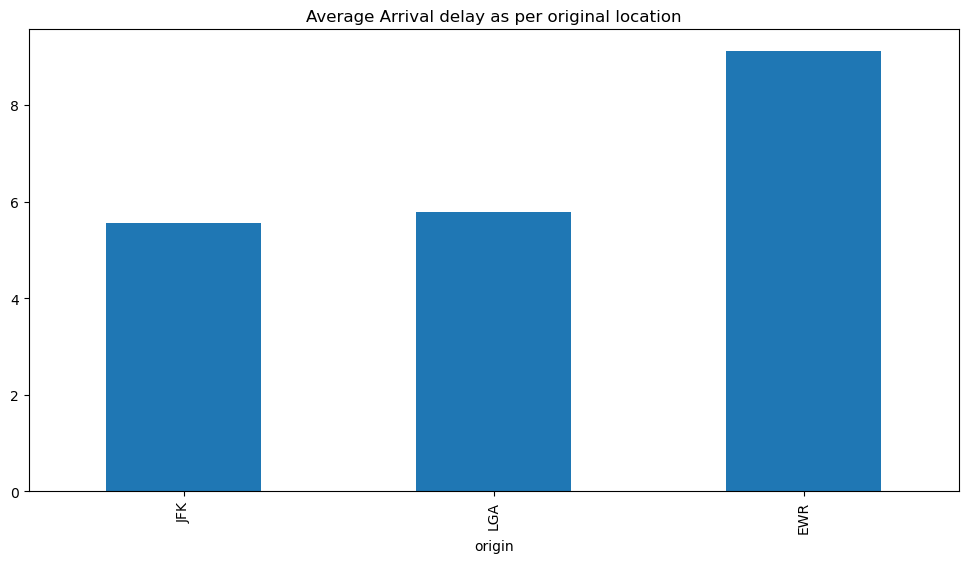

In [178]:
origin_arr.plot(kind='bar',figsize=(12,6))
plt.title('Average Arrival delay as per original location')
plt.show()

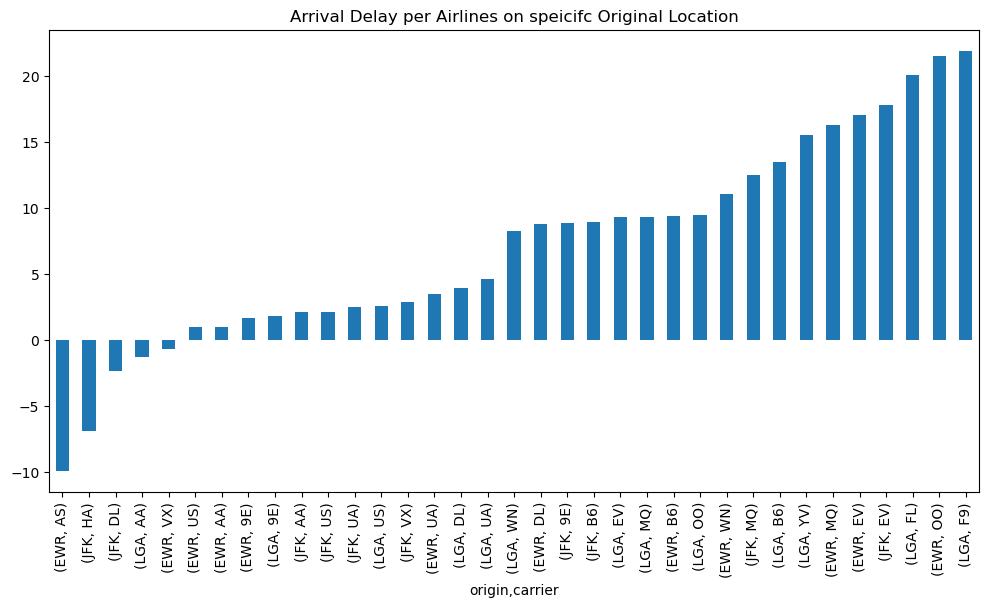

In [182]:
origin_arr_carrier.plot(kind='bar',figsize=(12,6))
plt.title('Arrival Delay per Airlines on speicifc Original Location')
plt.show()

Text(0.5, 1.0, 'BarPlot for different carrier Arrival delay at Origin')

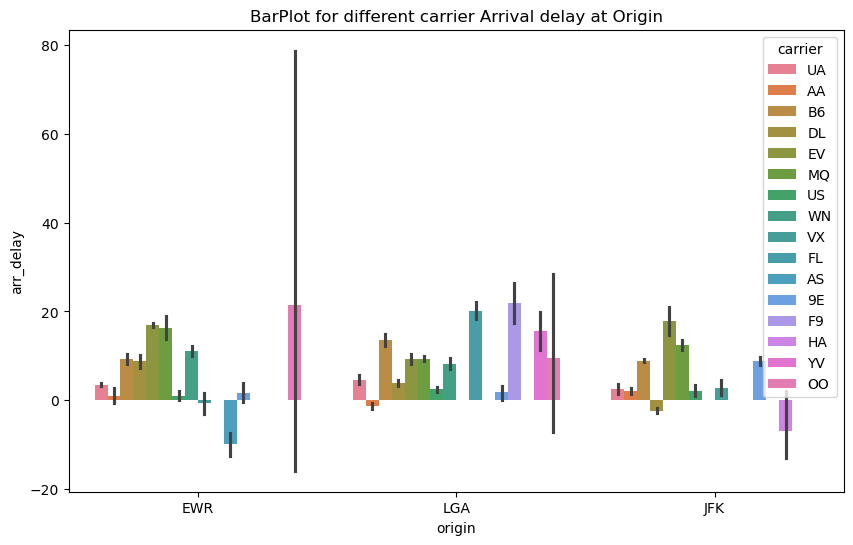

In [194]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df,x='origin',y='arr_delay',hue='carrier')
plt.title('BarPlot for different carrier Arrival delay at Origin')

#### 2.3 Analysis of routes

In [204]:
df['routes']=df['origin']+'-'+df['dest']
top_routes = df['routes'].value_counts().head(10)
print(top_routes)

routes
JFK-LAX    11262
LGA-ATL    10263
LGA-ORD     8857
JFK-SFO     8204
LGA-CLT     6168
EWR-ORD     6100
JFK-BOS     5898
LGA-MIA     5781
JFK-MCO     5464
EWR-BOS     5327
Name: count, dtype: int64


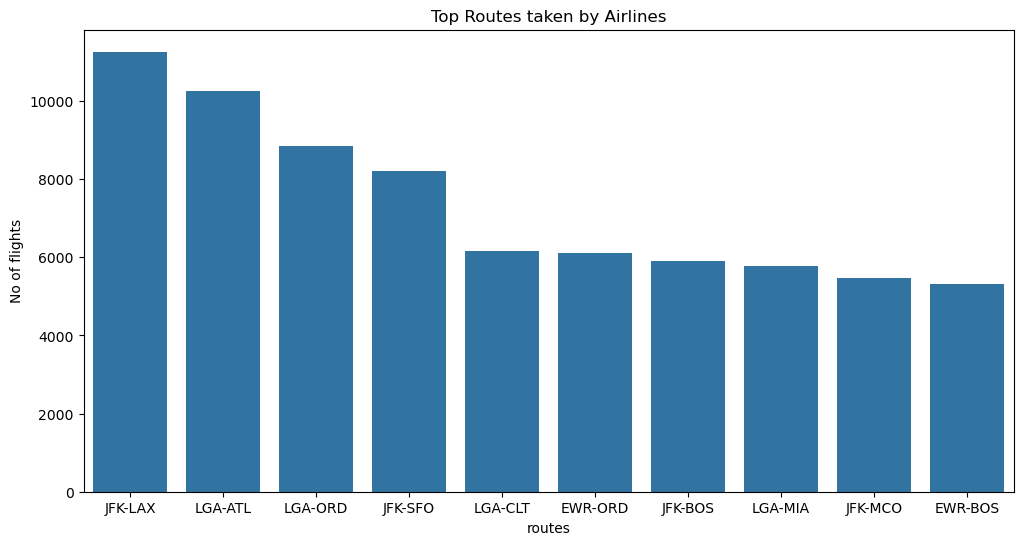

In [218]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_routes.index,y=top_routes.values)
plt.title('Top Routes taken by Airlines')
plt.ylabel('No of flights')
plt.show()

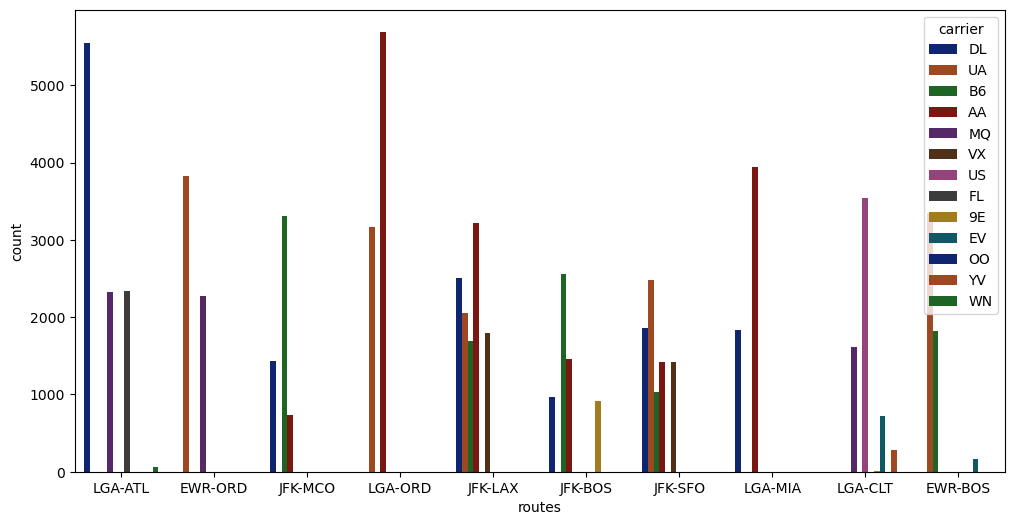

In [240]:
top_routes = df['routes'].value_counts().head(10).index
top_routes_df = df[df['routes'].isin(top_routes)]
plt.figure(figsize=(12,6))
sns.countplot(x='routes',hue='carrier',data=top_routes_df,palette='dark')
plt.show()
